In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [15]:
# import galaxies and clusters tables
df = pd.read_csv('../../HSC-unWISE-W02.csv')
df_cl = pd.read_table('../Wen+Han/clusters.dat', delim_whitespace=True, usecols=[0,3,4,5,9,11,12], names=['id_cl','ra_cl','dec_cl','phot_z_cl', 'r500_cl','mass_cl','n500_cl'])
df_cl = df_cl[(df_cl['id_cl'].isin(df.id_cl_near)) | (df_cl['id_cl'].isin(df.id_cl))]

(0.05, 2.5)

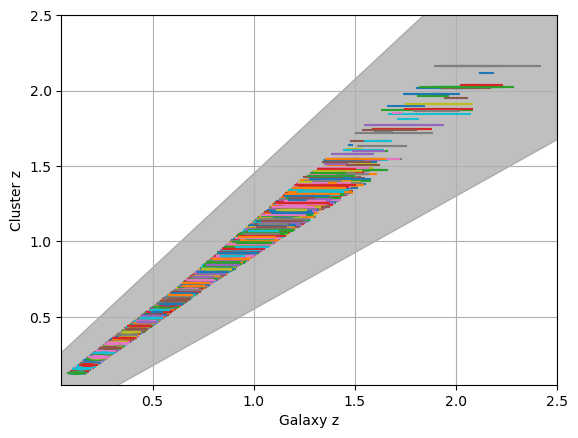

In [16]:
# function dz computes a z range, as a function of cluster's z
def dz(z):
    return 0.2 + z * 0.25

# add dz as a column of clusters' DataFrame
df_cl['d_phot_z'] = dz(df_cl['phot_z_cl'])

id_cl = df_cl.id_cl.values
for id in id_cl:
    d = df[df.id_cl == id]
    plt.plot(d.phot_z, d.phot_z_cl)

x = np.linspace(0,2.5,50)
plt.fill_between(x, x - dz(x), x + dz(x), alpha = 0.5, color = 'grey')
# plt.scatter(lost_members.phot_z, lost_members.phot_z_cl, color = 'black', zorder = 2000, s = 5)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.grid()
plt.xlabel('Galaxy z')
plt.ylabel('Cluster z')
plt.xlim(0.05,2.5)
plt.ylim(0.05,2.5)

In [17]:
df_new = pd.DataFrame()
d_phot_z = df_cl.d_phot_z.values
id_cl = df_cl.id_cl.values
phot_z_cl = df_cl.phot_z_cl.values
for id,d_z,z in zip(id_cl, d_phot_z, phot_z_cl):
    g = df[(df.id_cl_near == id)]
    g = g[abs(g.phot_z - z) <= d_z]
    df_new = pd.concat([df_new, g])
df_new = df_new.drop_duplicates(subset=['object_id'])

In [18]:
df_new = df_new.drop_duplicates(subset=['object_id'])
print(f'Members before: {df[df.member == 1].shape[0]/df.shape[0] * 100 :.2f}%   ({df[df.member == 1].shape[0]})')
print(f'Members after: {df_new[df_new.member == 1].shape[0]/df_new.shape[0] * 100 :.2f}%  ({df_new[df_new.member == 1].shape[0]})')

Members before: 32.67%   (33177)
Members after: 51.34%  (33177)


In [14]:
# some members were not in the new DataFrame, but I fixed it

# d1 = df[df.member == 1]
# d2 = df_new[df_new.member == 1]
# lost_members = d1[~d1['object_id'].isin(d2.object_id)]
# lost_members